In [28]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
female_birth_data=pd.read_csv("daily-total-female-births-CA.csv")

In [3]:
female_birth_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
birth_data=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

In [5]:
birth_data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
birth_data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

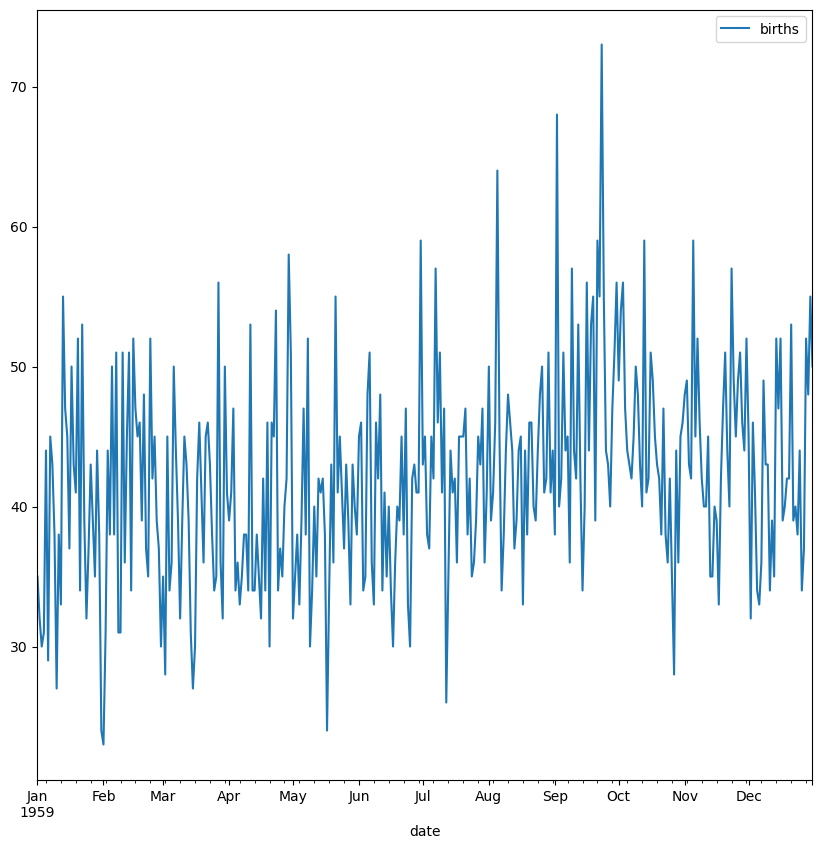

In [8]:
birth_data.plot(figsize=(10,10))

In [9]:
moving_average_birth=birth_data.rolling(window=20).mean()  

In [11]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


<AxesSubplot:xlabel='date'>

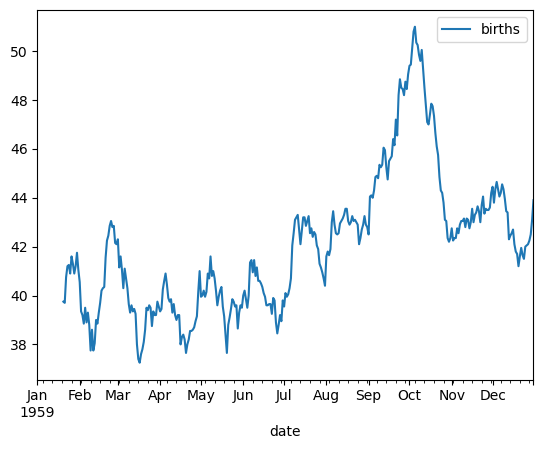

In [12]:
moving_average_birth.plot()

In [13]:
sm.stats.durbin_watson(birth_data)

array([0.04624491])

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


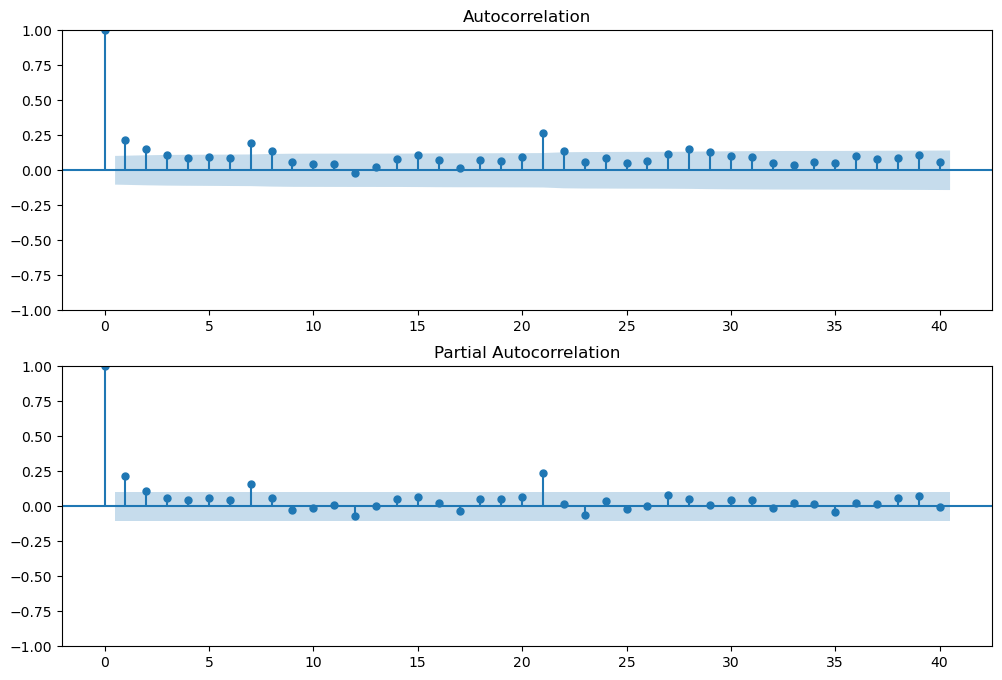

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=40, ax=ax2)

In [15]:
training_data=birth_data[0:320]
test_data=birth_data[320:]

In [21]:
arima= ARIMA(training_data,order=(2,1,3))

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
model=arima.fit()

In [23]:
model.aic

2167.8472399156767

In [26]:
pred= model.forecast(steps=45)

In [27]:
pred

1959-11-17    42.860640
1959-11-18    43.279106
1959-11-19    43.447916
1959-11-20    43.526926
1959-11-21    43.555955
1959-11-22    43.571614
1959-11-23    43.576065
1959-11-24    43.579508
1959-11-25    43.579919
1959-11-26    43.580824
1959-11-27    43.580709
1959-11-28    43.581005
1959-11-29    43.580894
1959-11-30    43.581010
1959-12-01    43.580947
1959-12-02    43.580998
1959-12-03    43.580966
1959-12-04    43.580989
1959-12-05    43.580974
1959-12-06    43.580985
1959-12-07    43.580977
1959-12-08    43.580983
1959-12-09    43.580979
1959-12-10    43.580981
1959-12-11    43.580980
1959-12-12    43.580981
1959-12-13    43.580980
1959-12-14    43.580981
1959-12-15    43.580980
1959-12-16    43.580981
1959-12-17    43.580980
1959-12-18    43.580981
1959-12-19    43.580980
1959-12-20    43.580981
1959-12-21    43.580980
1959-12-22    43.580981
1959-12-23    43.580980
1959-12-24    43.580980
1959-12-25    43.580980
1959-12-26    43.580980
1959-12-27    43.580980
1959-12-28    43

In [29]:
np.sqrt(mean_squared_error(test_data,pred))

6.536645061907506